<a href="https://colab.research.google.com/github/samuelbitancor/Thesis/blob/main/Training_Custom_Dataset_with_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Requirements:**

*   Google Colab
*   Notepad++
*   Internet Connection

# **Compiling Requirements**

##**Mount Google Drive to Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Clone [darknet](https://pjreddie.com/darknet/) repository**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.03 MiB | 1.82 MiB/s, done.
Resolving deltas: 100% (10346/10346), done.


##**Update Makefile**

Following hyperparameters must be:

```
1 GPU=1
2 CUDNN=1
4 OPENCV=1
```



In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

##**Copy YOLOv3 configuration file and update its following hyperparameters:**


```
6   batch=<<2 or 64>>
7   subdivision=8
20  max_batches=<<no of classes * 2000>>
22  steps = <<80% of max_batches>>,<<90% of max_batches>>
603 filters = <<(num_classes + 5)*3>>
610 classes = <<number of classes>>
```
**Note:**
*    Comment the Testing hyperparameters (batch, subdivisions) and Uncomment the Training hyperparameters (batch, subdivisions)
*    Save the file as "yolov3_custom.cfg"
*    Source file: darknet/cfg/yolov3.cfg
*    Destination file: darknet/cfg/yolov3_training.cfg



In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=2/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=8/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i 's/steps=400000,450000/steps=3200,3600/' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg

# Optional
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg

##**Create and update names file by following:**
1.   Create "data/obj.names"
2.   Download "data/obj.names"
3.   Update "obj.names" and replace content with list of classes separated in row
4.   Replace "data/obj.names"

Example:
```
1 class1
2 class2
3 class3
```





In [ ]:
from google.colab import files
!echo "Insert class names here" > data/classes.names
files.download("data/classes.names")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!rm data/classes.names

In [ ]:
# Update classes.names before uploading
%cd data/
files.upload()
%cd ..

/content/darknet/data


Saving classes.names to classes.names
/content/darknet


##**Copy darknet model 53 to Google Colab**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-03-02 14:43:22--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.2MB/s    in 8.4s    

2022-03-02 14:43:31 (18.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



##**Compress the dataset, annotation, and classes.txt and upload to Google Drive**


*   **Note:** The files must be compressed not the folder containing the files)

In [ ]:
# files.upload()

##**Unzip the uploaded file**

In [ ]:
# !unzip 'images.zip' -d data/obj
!unzip '../drive/MyDrive/yolov3/images.zip' -d data/obj
#!ls

Archive:  ../drive/MyDrive/yolov3/images.zip
 extracting: data/obj/classes.txt    
  inflating: data/obj/R1_1_1.jpg     
  inflating: data/obj/R1_1_1.txt     
  inflating: data/obj/R1_1_10.jpg    
  inflating: data/obj/R1_1_10.txt    
  inflating: data/obj/R1_1_100.jpg   
  inflating: data/obj/R1_1_100.txt   
  inflating: data/obj/R1_1_11.jpg    
 extracting: data/obj/R1_1_11.txt    
  inflating: data/obj/R1_1_12.jpg    
  inflating: data/obj/R1_1_12.txt    
  inflating: data/obj/R1_1_13.jpg    
  inflating: data/obj/R1_1_13.txt    
  inflating: data/obj/R1_1_14.jpg    
  inflating: data/obj/R1_1_14.txt    
  inflating: data/obj/R1_1_15.jpg    
  inflating: data/obj/R1_1_15.txt    
  inflating: data/obj/R1_1_16.jpg    
  inflating: data/obj/R1_1_16.txt    
  inflating: data/obj/R1_1_17.jpg    
  inflating: data/obj/R1_1_17.txt    
 extracting: data/obj/R1_1_18.jpg    
  inflating: data/obj/R1_1_18.txt    
 extracting: data/obj/R1_1_19.jpg    
  inflating: data/obj/R1_1_19.txt    
  inf

In [ ]:
import os
if os.path.isfile('data/obj/classes.txt'): 
  print('Proceed to next step')
else:
  print("Upload the classes.txt inside 'data/obj/'")

Proceed to next step


##**Clone this [Github repository](https://github.com/jakkcoder/training_yolo_custom_object_detection_files) and update the following:**

**For "creating-files-data-and-name.py", update to:**
```
36 full_path_to_images = 'data/obj'
```
**For "creating-train-and-test-txt-files.py", update to:**
```
39 full_path_to_images = 'data/obj'
74 if f.endswith('.jpg'):
```



In [ ]:
%cd ..
!git clone https://github.com/jakkcoder/Training_Yolo_Custom_Object_Detection_files.git

/content
Cloning into 'Training_Yolo_Custom_Object_Detection_files'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
# %cd ..
!sed -i "36s@full_path_to_images = '/home/my_name/Downloads/video-to-annotate'@full_path_to_images = 'darknet/data/obj'@" Training_Yolo_Custom_Object_Detection_files/creating-files-data-and-name.py

In [ ]:
!sed -i "39s@full_path_to_images = '/home/my_name/Downloads/video-to-annotate'@full_path_to_images = 'darknet/data/obj'@" Training_Yolo_Custom_Object_Detection_files/creating-train-and-test-txt-files.py
!sed -i "74s@if f.endswith('.jpeg'):@if f.endswith('.jpg'):@" Training_Yolo_Custom_Object_Detection_files/creating-train-and-test-txt-files.py

##**Execute the following files:**
*   "creating-files-data-and-name.py"
*   "creating-train-and-test-txt-files.py"



In [ ]:
!python Training_Yolo_Custom_Object_Detection_files/creating-files-data-and-name.py
!python Training_Yolo_Custom_Object_Detection_files/creating-train-and-test-txt-files.py

#**Model Training**

## **Connect to Google Colab's free GPU**


*   Edit > Notebook Settings: Select GPU in Hardware Acceleration
*   Type "!nvidia-smi" for connection confirmation
*   Type "!/usr/local/cuda/bin/nvcc --version" to verify CUDA



In [ ]:
!nvidia-smi

In [ ]:
!/usr/local/cuda/bin/nvcc --version

##**Train the model**

In [ ]:
%cd darknet
!./darknet detector train data/obj/labelled_data.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -gpus 0

#**Model Testing**

In [ ]:
!./darknet detector test data/obj/labelled_data.data cfg/yolov3_training.cfg backup/yolov3_training_final.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

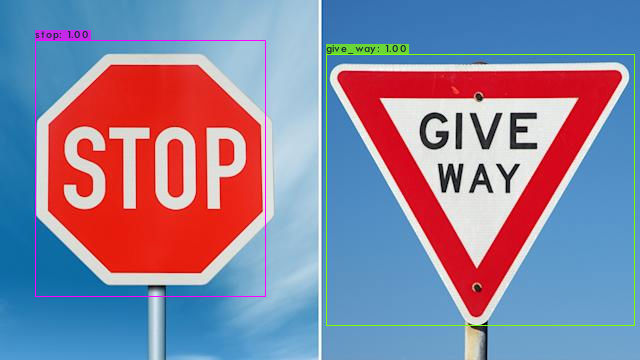

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/darknet/predictions.jpg') 
cv2_imshow(img)